In [2]:
import pandas as pd

df1 = pd.read_csv("other_0_1_comparison_metrics.csv")
df2 = pd.read_csv("gradient_0_1_comparison_metrics.csv")

# Merge column-wise based on keys 'N' and 'K'
df = pd.merge(df1, df2, on=["N", "K"], how="inner")

# Rename columns
df.rename(
    columns={
        "Grad_acc_mean": "GradEM_acc_mean",
        "Grad_wacc_mean": "GradEM_wacc_mean",
        "Grad_tau_mean": "GradEM_tau_mean",
        "Grad_acc_std": "GradEM_acc_std",
        "Grad_wacc_std": "GradEM_wacc_std",
        "Grad_tau_std": "GradEM_tau_std",
    },
    inplace=True
)

# Drop the first row
df = df.iloc[1:]

# Inspect
df.head()

,N,K,PGEM_acc_mean,PGEM_acc_std,PGEM_wacc_mean,PGEM_wacc_std,PGEM_tau_mean,PGEM_tau_std,BT_acc_mean,BT_acc_std,...,CrowdBT_wacc_mean,CrowdBT_wacc_std,CrowdBT_tau_mean,CrowdBT_tau_std,GradEM_acc_mean,GradEM_acc_std,GradEM_wacc_mean,GradEM_wacc_std,GradEM_tau_mean,GradEM_tau_std
1,50,2,0.943327,0.013464,0.992504,0.003853,0.886654,0.026927,0.940163,0.017754,...,0.992230,0.003853,0.885878,0.027829,0.913592,0.066235,0.974764,0.065751,0.827184,0.132470
2,50,6,0.943600,0.010595,0.993931,0.001889,0.887200,0.021189,0.938612,0.016512,...,0.993581,0.001863,0.886416,0.023620,0.931714,0.026341,0.987410,0.011709,0.863429,0.052682
3,100,8,0.922438,0.008736,0.983820,0.004520,0.844877,0.017472,0.907535,0.017567,...,0.983943,0.004322,0.843745,0.016807,0.924766,0.011053,0.986305,0.003086,0.849531,0.022106
4,200,8,0.892744,0.018749,0.970574,0.009868,0.785488,0.037498,0.872131,0.028445,...,0.969982,0.010535,0.784697,0.038708,0.893731,0.013169,0.972403,0.009092,0.787461,0.026338
5,100,10,0.923749,0.008764,0.985317,0.004102,0.847499,0.017528,0.909253,0.016941,...,0.984418,0.004602,0.842590,0.018421,0.924519,0.011504,0.984663,0.005485,0.849038,0.023007


In [3]:
# !pip install seaborn

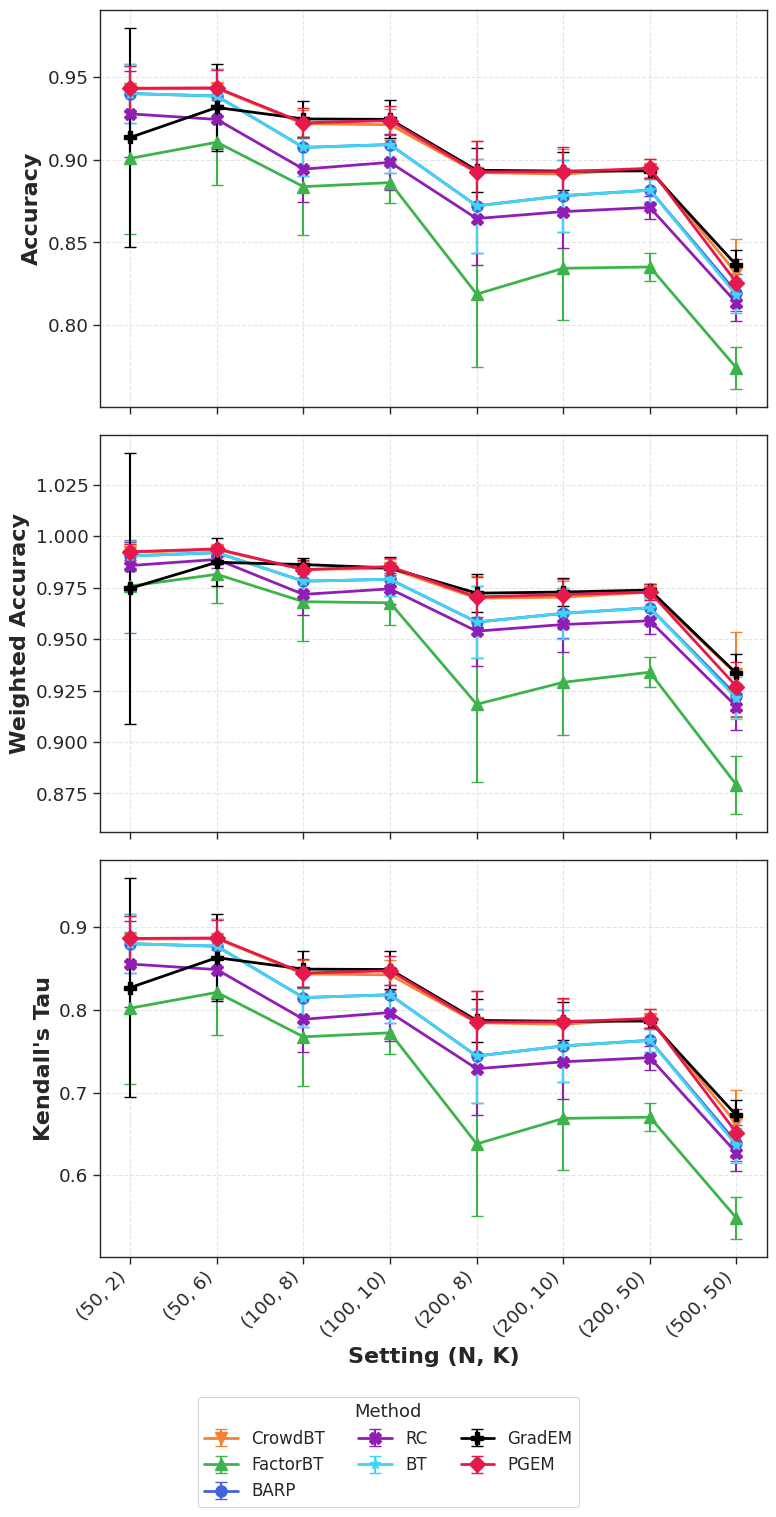

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure N and K are treated as integers
df['N'] = df['N'].astype(int)
df['K'] = df['K'].astype(int)

# Create "Setting" column for the X-axis label in (N, K) format
df['Setting'] = df.apply(lambda row: f"({row['N']}, {row['K']})", axis=1)

# Sort the dataframe
df = df.sort_values(by=['N', 'K'])

# Extract the sorted settings and create an index for plotting
settings_order = df['Setting'].values
x_indices = np.arange(len(settings_order))

# Define the parameters
methods = ['CrowdBT', 'FactorBT', 'BARP', 'RC', 'BT','GradEM', 'PGEM']
metrics = ['acc', 'wacc', 'tau']

# Six distinct high-contrast colors
colors = ["#F58231" , "#3CB44B", "#4363D8", "#911EB4", "#42D4F4", "#010000", "#E6194B"]
        



# colors = sns.color_palette("husl", len(methods))
markers = ['v',  '^', 'o', 'X', '*', 'P', 'D']

# Styling
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5)

# Create a single figure with 3 subplots stacked vertically
# sharex=True ensures that only the bottom plot needs x-labels
fig, axes = plt.subplots(3, 1, figsize=(8, 14), sharex=True)
title_map = {'acc': 'Accuracy', 'wacc': 'Weighted Accuracy', 'tau': "Kendall's Tau"}

handles, labels = [], []

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    for j, method in enumerate(methods):
        mean_col = f"{method}_{metric}_mean"
        std_col = f"{method}_{metric}_std"
        
        means = df[mean_col].values
        stds = df[std_col].values
        
        line = ax.errorbar(x_indices, means, yerr=stds, label=method, 
                           marker=markers[j], markersize=8, 
                           capsize=4, elinewidth=1.5, linewidth=2, 
                           color=colors[j])
        
        # Collect handles for the legend from the first subplot
        if i == 0:
            handles.append(line)
            labels.append(method)
        
    # Formatting each subplot
    ax.set_ylabel(title_map.get(metric, metric.upper()), fontsize=16, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Only show the X-axis labels on the bottom subplot
    if i == 2:
        ax.set_xticks(x_indices)
        ax.set_xticklabels(settings_order, rotation=45, ha='right')
        ax.set_xlabel('Setting (N, K)', fontsize=16, fontweight='bold')

# Add a single legend for the entire figure at the top
fig.legend(handles, labels, title="Method", loc='upper center', 
           bbox_to_anchor=(0.5, 0), ncol=3, 
           fontsize=12, title_fontsize=13, frameon=True)

plt.tight_layout()

os.makedirs("svgs",exist_ok=True)
os.makedirs("pdfs",exist_ok=True)

# --- SAVING AS SVG AND PDF ---
# Saving as SVG (Scalable Vector Graphics)
plt.savefig('svgs/0_1_vertical_metrics_comparison.svg', format='svg', bbox_inches='tight')

# Saving as PDF
plt.savefig('pdfs/0_1_vertical_metrics_comparison.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [9]:
import pandas as pd
df1 = pd.read_csv("other_-1_1_comparison_metrics.csv")
df2 = pd.read_csv("gradient_-1_1_comparison_metrics.csv")

# Merge column-wise based on keys 'N' and 'K'
df = pd.merge(df1, df2, on=["N", "K"], how="inner")

# Rename columns
df.rename(
    columns={
        "Grad_acc_mean": "GradEM_acc_mean",
        "Grad_wacc_mean": "GradEM_wacc_mean",
        "Grad_tau_mean": "GradEM_tau_mean",
        "Grad_acc_std": "GradEM_acc_std",
        "Grad_wacc_std": "GradEM_wacc_std",
        "Grad_tau_std": "GradEM_tau_std",
    },
    inplace=True
)

# Drop the first row
df = df.iloc[1:]

# Inspect
df.head()

,N,K,PGEM_acc_mean,PGEM_acc_std,PGEM_wacc_mean,PGEM_wacc_std,PGEM_tau_mean,PGEM_tau_std,BT_acc_mean,BT_acc_std,...,CrowdBT_wacc_mean,CrowdBT_wacc_std,CrowdBT_tau_mean,CrowdBT_tau_std,GradEM_acc_mean,GradEM_acc_std,GradEM_wacc_mean,GradEM_wacc_std,GradEM_tau_mean,GradEM_tau_std
1,50,2,0.943220,0.013520,0.992514,0.003852,0.886452,0.027052,0.940163,0.017754,...,0.992230,0.003853,0.885878,0.027829,0.938849,0.043640,0.987182,0.039987,0.877698,0.087280
2,50,6,0.943665,0.010618,0.993932,0.001897,0.887330,0.021236,0.938612,0.016512,...,0.993581,0.001863,0.886416,0.023620,0.939069,0.014780,0.989844,0.006587,0.878139,0.029560
3,100,8,0.922398,0.008661,0.983831,0.004515,0.844796,0.017323,0.907535,0.017567,...,0.983965,0.004307,0.843822,0.016909,0.924846,0.010145,0.985751,0.003682,0.849693,0.020290
4,200,8,0.892550,0.018772,0.970376,0.010094,0.785099,0.037544,0.872126,0.028394,...,0.969562,0.010847,0.783906,0.038976,0.877001,0.018382,0.962725,0.010387,0.754002,0.036763
5,100,10,0.923725,0.008670,0.985299,0.004047,0.847451,0.017341,0.909192,0.016899,...,0.984398,0.004702,0.842440,0.018705,0.922352,0.013081,0.982998,0.008525,0.844703,0.026162


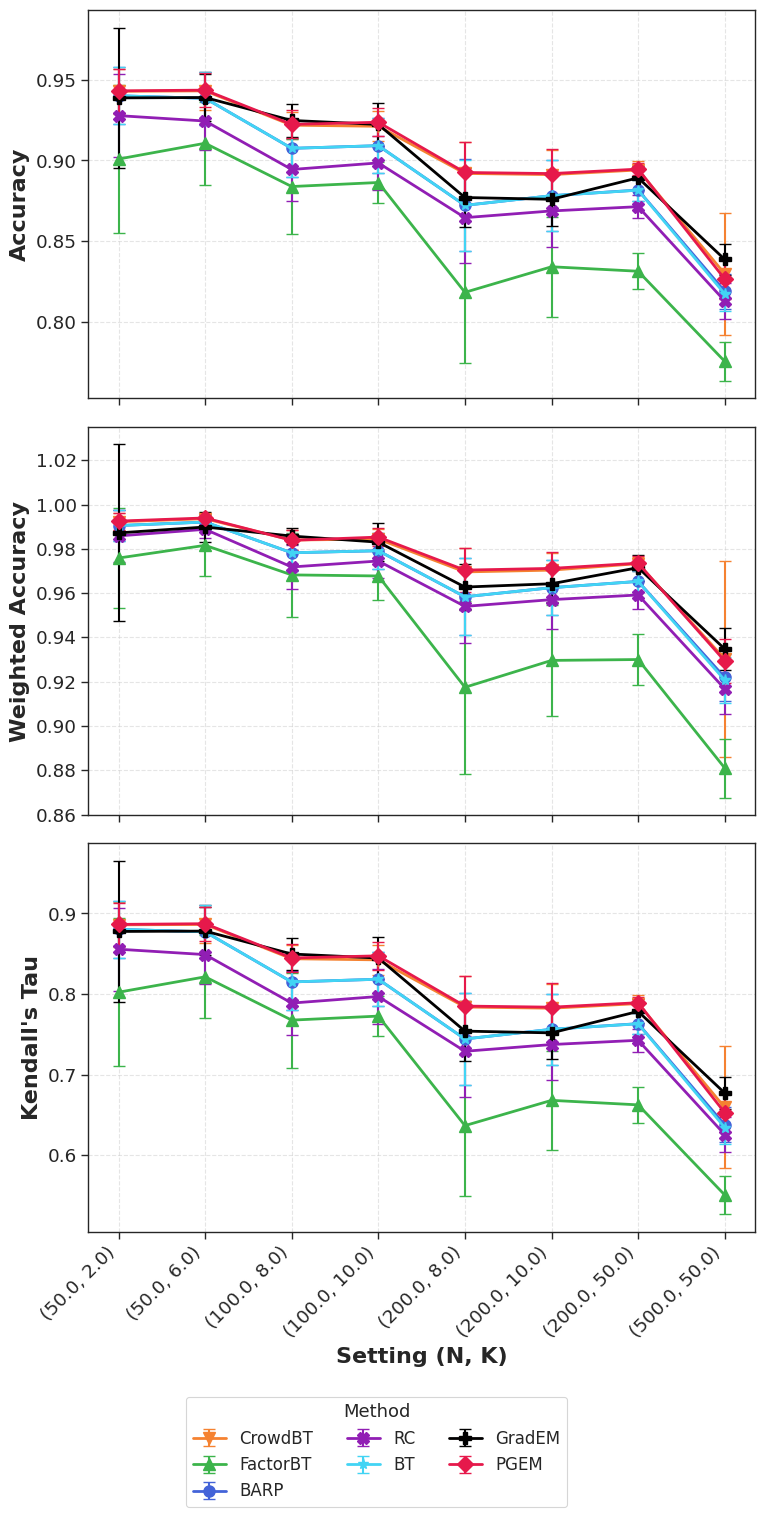

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure N and K are treated as integers
df['N'] = df['N'].astype(int)
df['K'] = df['K'].astype(int)

# Create "Setting" column for the X-axis label in (N, K) format
df['Setting'] = df.apply(lambda row: f"({row['N']}, {row['K']})", axis=1)

# Sort the dataframe
df = df.sort_values(by=['N', 'K'])

# Extract the sorted settings and create an index for plotting
settings_order = df['Setting'].values
x_indices = np.arange(len(settings_order))

# Define the parameters
methods = ['CrowdBT', 'FactorBT', 'BARP', 'RC', 'BT','GradEM', 'PGEM']
metrics = ['acc', 'wacc', 'tau']

# Six distinct high-contrast colors
colors = ["#F58231" , "#3CB44B", "#4363D8", "#911EB4", "#42D4F4", "#010000", "#E6194B"]
        



# colors = sns.color_palette("husl", len(methods))
markers = ['v',  '^', 'o', 'X', '*', 'P', 'D']

# Styling
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5)

# Create a single figure with 3 subplots stacked vertically
# sharex=True ensures that only the bottom plot needs x-labels
fig, axes = plt.subplots(3, 1, figsize=(8, 14), sharex=True)
title_map = {'acc': 'Accuracy', 'wacc': 'Weighted Accuracy', 'tau': "Kendall's Tau"}

handles, labels = [], []

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    for j, method in enumerate(methods):
        mean_col = f"{method}_{metric}_mean"
        std_col = f"{method}_{metric}_std"
        
        means = df[mean_col].values
        stds = df[std_col].values
        
        line = ax.errorbar(x_indices, means, yerr=stds, label=method, 
                           marker=markers[j], markersize=8, 
                           capsize=4, elinewidth=1.5, linewidth=2, 
                           color=colors[j])
        
        # Collect handles for the legend from the first subplot
        if i == 0:
            handles.append(line)
            labels.append(method)
        
    # Formatting each subplot
    ax.set_ylabel(title_map.get(metric, metric.upper()), fontsize=16, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Only show the X-axis labels on the bottom subplot
    if i == 2:
        ax.set_xticks(x_indices)
        ax.set_xticklabels(settings_order, rotation=45, ha='right')
        ax.set_xlabel('Setting (N, K)', fontsize=16, fontweight='bold')

# Add a single legend for the entire figure at the top
fig.legend(handles, labels, title="Method", loc='upper center', 
           bbox_to_anchor=(0.5, 0), ncol=3, 
           fontsize=12, title_fontsize=13, frameon=True)

plt.tight_layout()

os.makedirs("svgs",exist_ok=True)
os.makedirs("pdfs",exist_ok=True)

# --- SAVING AS SVG AND PDF ---
# Saving as SVG (Scalable Vector Graphics)
plt.savefig('svgs/-1_1_vertical_metrics_comparison.svg', format='svg', bbox_inches='tight')

# Saving as PDF
plt.savefig('pdfs/-1_1_vertical_metrics_comparison.pdf', format='pdf', bbox_inches='tight')

plt.show()